In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
Crime_Data=pd.read_csv("G:/ExcelR_Data/Data_Science_Course/Assignments/Clustering/crime_data.csv")
Crime_Data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
Crime_Data.isnull().sum()
#NO Null values are present

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [4]:
#Print the duplicated rows
Crime_Data[Crime_Data.duplicated()]
#No duplicate rows

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [5]:
#Normalization Function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [6]:
#Normalized data frame
df_norm=norm_func(Crime_Data.iloc[:,1:])

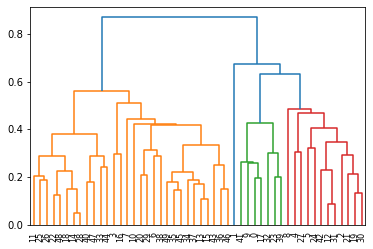

In [7]:
#Create Dendrogram
#dendrogram=sch.dendrogram(sch.linkage(df_norm,method='single'))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))


In [8]:
#Create clusters
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [9]:
#Save clusters for chart
y_hc=hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [10]:
Crime_Data['clusterid']=hc.labels_
Crime_Data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [11]:
Clusters.head(10)

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [12]:
# getting aggregate mean of each cluster
Crime_Data.iloc[:,1:5].groupby(Crime_Data.clusterid).mean()

,Murder,Assault,UrbanPop,Rape
clusterid,,,,
0,4.870000,114.433333,63.633333,15.943333
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,14.671429,251.285714,54.285714,21.685714
